## MEDICAL INSURANCE  PREMIUM ANALYSIS & PREDICTION

#### The objective of this project is to analyze factors affecting medical insurance premiums and build a predictive model to estimate premium costs based on customer demographics and health risk factors.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Data

In [2]:
mdf=pd.read_csv("Documents/medical_insurance.csv")

In [3]:
mdf

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6266,50,Male,West,Urban,127200.0,No HS,Married,Employed,2,...,0,0,0,0,0,1,0,0,0,0
99996,54887,42,Male,East,Suburban,21600.0,HS,Married,Employed,2,...,0,0,0,0,0,0,0,0,0,0
99997,76821,41,Male,West,Rural,81900.0,HS,Divorced,Unemployed,1,...,0,0,0,1,0,1,0,0,0,0
99998,861,51,Female,South,Urban,43400.0,Doctorate,Single,Unemployed,3,...,0,0,1,0,0,2,2,1,0,0


#### Basic Understanding

In [4]:
mdf.shape

(100000, 54)

In [5]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

In [6]:
mdf.describe()

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


#### Check Missing Values

In [7]:
mdf.isnull().sum()

person_id                          0
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
p

In [8]:
mdf["alcohol_freq"]

0               NaN
1            Weekly
2               NaN
3               NaN
4             Daily
            ...    
99995    Occasional
99996    Occasional
99997        Weekly
99998    Occasional
99999           NaN
Name: alcohol_freq, Length: 100000, dtype: object

In [9]:
mdf["alcohol_freq"].fillna("No",inplace=True)

In [10]:
mdf["alcohol_freq"].isnull().sum()

np.int64(0)

In [11]:
mdf.columns

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'education', 'marital_status', 'employment_status', 'household_size',
       'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd',
       'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure'],
      

In [12]:
mdf["age"].describe()

count    100000.000000
mean         47.521500
std          15.988752
min           0.000000
25%          37.000000
50%          48.000000
75%          58.000000
max         100.000000
Name: age, dtype: float64

In [13]:
mdf.drop(["hospitalizations_last_3yrs","days_hospitalized_last_3yrs","proc_physio_count","proc_consult_count","proc_lab_count","monthly_premium"],axis=1
,inplace=True)



In [14]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   person_id                 100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   sex                       100000 non-null  object 
 3   region                    100000 non-null  object 
 4   urban_rural               100000 non-null  object 
 5   income                    100000 non-null  float64
 6   education                 100000 non-null  object 
 7   marital_status            100000 non-null  object 
 8   employment_status         100000 non-null  object 
 9   household_size            100000 non-null  int64  
 10  dependents                100000 non-null  int64  
 11  bmi                       100000 non-null  float64
 12  smoker                    100000 non-null  object 
 13  alcohol_freq              100000 non-null  ob

#### EDA

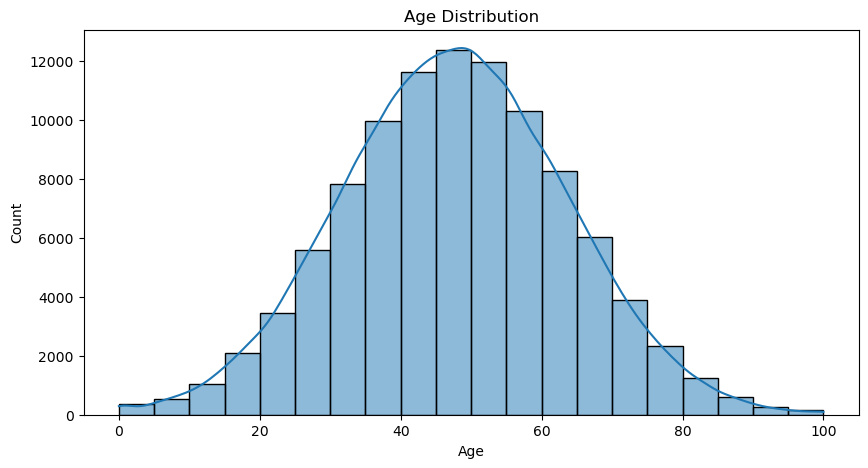

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(mdf["age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
# kde= kernel density estimate -it put a smooth curve (False-only bar,True-curve+bar)

### What is the average medical cost by gender?

In [16]:
mdf.groupby("sex")["annual_medical_cost"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,49193.0,3000.034652,3127.514725,57.85,1170.49,2070.83,3690.2800,65724.90
Male,48794.0,3019.940991,3131.482609,55.55,1179.10,2094.80,3728.2325,65431.24
Other,2013.0,2985.337978,3027.745821,107.12,1186.23,2080.72,3601.3500,36644.73


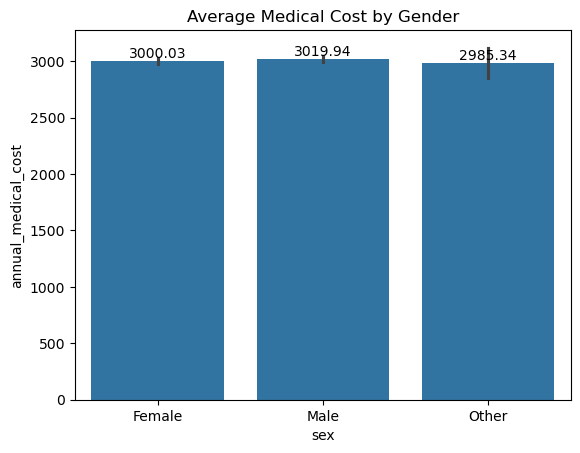

In [17]:
bc=sns.barplot(x="sex",y="annual_medical_cost",data=mdf)
for container in bc.containers:
    bc.bar_label(container)
plt.title("Average Medical Cost by Gender")
plt.show()

### Do smokers have higher medical costs?


In [18]:
mdf.groupby("smoker")["annual_medical_cost"].mean().round(2)

smoker
Current    4295.56
Former     3161.77
Never      2746.01
Name: annual_medical_cost, dtype: float64

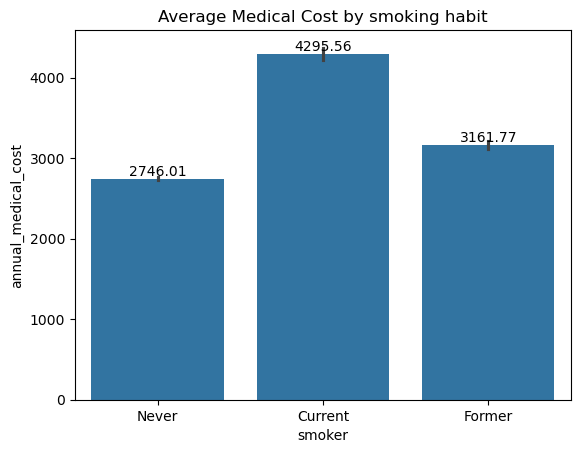

In [19]:
ac=sns.barplot(x="smoker",y="annual_medical_cost",data=mdf)

for container in ac.containers:
    ac.bar_label(container)
plt.title("Average Medical Cost by smoking habit")
plt.show()

### How does age group impact medical expenses?

In [20]:
mdf["age"].min()


0

In [21]:
mdf["age"].max()

100

In [22]:
mdf["age_group"] = pd.cut(mdf["age"],
                         bins=[0,18,30,45,60,80,100],
                         labels=["1-18","19-30","31-45","46-60","61-80","81-100"],right=True)
# we use pd.cut to cut the numeric data into range(bins)
#labels to names assigned to each range

In [23]:
mdf["age_group"]

0        46-60
1        61-80
2        61-80
3         1-18
4        46-60
         ...  
99995    46-60
99996    31-45
99997    31-45
99998    46-60
99999    31-45
Name: age_group, Length: 100000, dtype: category
Categories (6, object): ['1-18' < '19-30' < '31-45' < '46-60' < '61-80' < '81-100']

In [24]:
mdf.groupby("age_group",observed=True)["annual_medical_cost"].mean().round(3)
#observe means only show categories that actually exist in the data.

age_group
1-18      2331.689
19-30     2463.574
31-45     2750.132
46-60     3129.865
61-80     3529.980
81-100    4187.008
Name: annual_medical_cost, dtype: float64

INSIGHTS-
The average medical cost increases from ₹2463 in the 18–30 group to ₹4187 in the 60+ group, confirming that older patients generate higher healthcare expenses

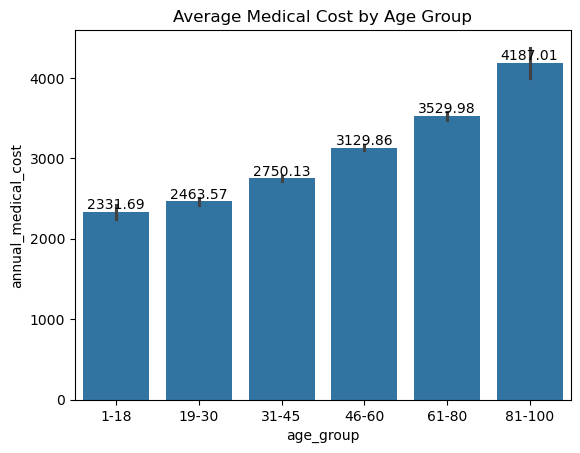

In [25]:
cc=sns.barplot(x="age_group",y="annual_medical_cost",data=mdf)

for container in cc.containers:
    cc.bar_label(container)
plt.title("Average Medical Cost by Age Group")
plt.show()

#### How BMI effects Medical Expenses

In [26]:
mdf["bmi"].min()


12.0

In [27]:
mdf["bmi"].max()

50.4

In [28]:
mdf["bmi_group"] = pd.cut(mdf["bmi"],
                         bins=[0,5,10,15,20,25,30,35,40,45,50,55],
                         labels=["1-5","6-10","11-15","16-20","21-25","26-30","31-35","36-40","41-45","46-50","51-55"],right=True)

In [29]:
mdf["bmi_group"]


0        26-30
1        26-30
2        31-35
3        31-35
4        31-35
         ...  
99995    26-30
99996    26-30
99997    26-30
99998    21-25
99999    26-30
Name: bmi_group, Length: 100000, dtype: category
Categories (11, object): ['1-5' < '6-10' < '11-15' < '16-20' ... '36-40' < '41-45' < '46-50' < '51-55']

In [30]:
mdf.groupby("bmi_group",observed=True)["annual_medical_cost"].mean()

bmi_group
11-15    2544.270613
16-20    2762.982454
21-25    2910.630818
26-30    3016.562188
31-35    3161.651754
36-40    3224.293435
41-45    3507.236841
46-50    5825.492500
51-55    2289.345000
Name: annual_medical_cost, dtype: float64

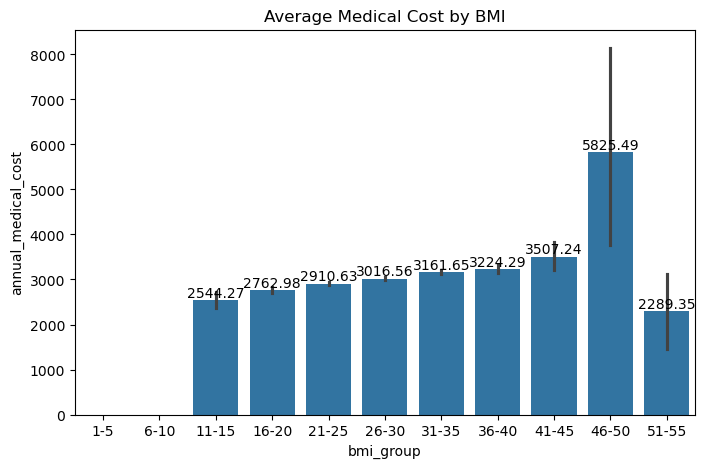

In [31]:
plt.figure(figsize=(8,5))
cc=sns.barplot(x="bmi_group",y="annual_medical_cost",data=mdf)

for container in cc.containers:
    cc.bar_label(container)
plt.title("Average Medical Cost by BMI")
plt.show()

In [32]:
mdf['bmi_group'].value_counts()

bmi_group
26-30    37996
21-25    26714
31-35    21659
16-20     7393
36-40     4923
11-15      865
41-45      440
46-50        8
51-55        2
6-10         0
1-5          0
Name: count, dtype: int64

#### Region-wise premium comparison

In [33]:
region_premium = mdf.groupby("region")["annual_premium"].mean().sort_values(ascending=False)
print(region_premium)

region
South      586.281693
West       582.989815
North      582.135640
East       578.645895
Central    578.551295
Name: annual_premium, dtype: float64


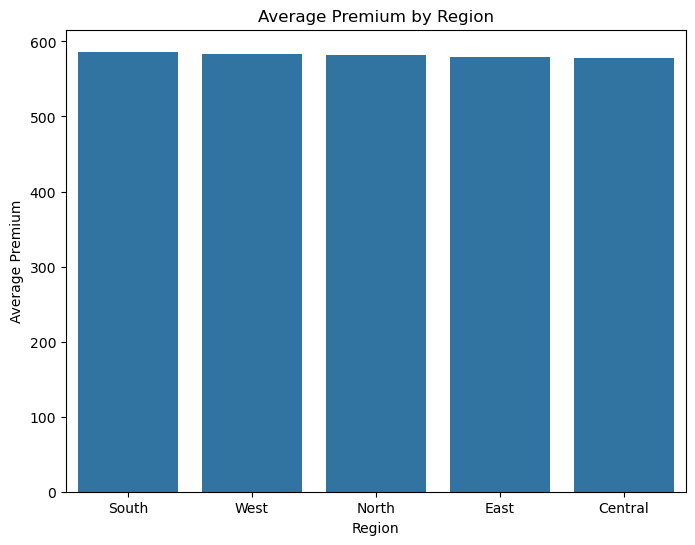

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x=region_premium.index, y=region_premium.values)

plt.title("Average Premium by Region")
plt.xlabel("Region")
plt.ylabel("Average Premium")

plt.show()

#### Alcohol frequency impact

In [35]:
alcohol_premium = mdf.groupby("alcohol_freq")["annual_premium"].mean().sort_values(ascending=False)
print(alcohol_premium)


alcohol_freq
Daily         587.939604
No            582.848744
Occasional    582.420859
Weekly        579.870520
Name: annual_premium, dtype: float64


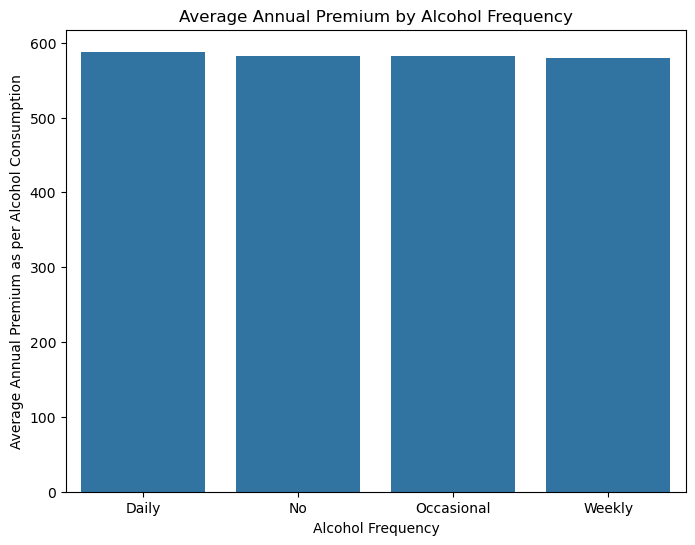

In [36]:
plt.figure(figsize=(8,6))
sns.barplot(x=alcohol_premium.index, y=alcohol_premium.values)

plt.title("Average Annual Premium by Alcohol Frequency")
plt.xlabel("Alcohol Frequency")
plt.ylabel("Average Annual Premium as per Alcohol Consumption")
plt.show()


#### Which insurance plan has the highest claims number?

In [37]:
mdf.groupby("plan_type")["claims_count"].agg(["sum","mean","count"])
#Total number of claims made under each insurance plan eg.1000
# On average, how many claims does one customer make under each plan eg:1000/500=2
# Number of customers

,sum,mean,count
plan_type,,,
EPO,24592,1.626347,15121
HMO,56703,1.633010,34723
POS,23964,1.598772,14989
PPO,56919,1.618534,35167


#### Income vs insurance premium relationship

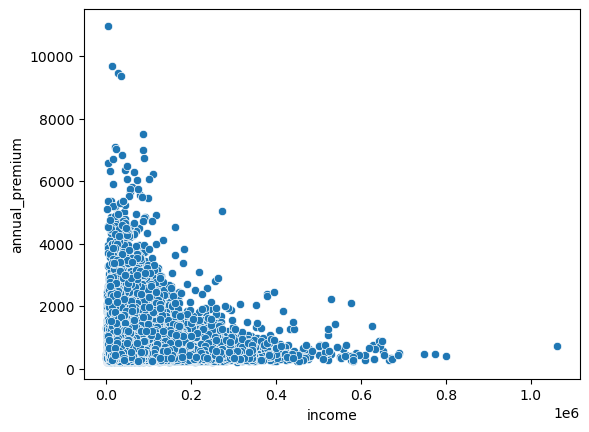

In [38]:
sns.scatterplot(x="income", y="annual_premium", data=mdf)
plt.show()
# Moving right → income increases
#Moving up → premium increases
#If dots go upward diagonally → positive relationship
#If dots go downward → negative relationship
#If dots are random → no relationship